In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as md
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
pd.options.display.max_rows = 4000

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\2018Floor1.csv
dataset\2018Floor2.csv
dataset\2018Floor3.csv
dataset\2018Floor4.csv
dataset\2018Floor5.csv
dataset\2018Floor6.csv
dataset\2018Floor7.csv
dataset\2019Floor1.csv
dataset\2019Floor2.csv
dataset\2019Floor3.csv
dataset\2019Floor4.csv
dataset\2019Floor5.csv
dataset\2019Floor6.csv
dataset\2019Floor7.csv


# Объединяем данные в единый датасет

In [2]:
list_csv = []

for file in os.listdir('dataset'):
    if file.endswith(".csv"):
        list_csv.append(os.path.join('dataset', file))
        
list_csv

['dataset\\2018Floor1.csv',
 'dataset\\2018Floor2.csv',
 'dataset\\2018Floor3.csv',
 'dataset\\2018Floor4.csv',
 'dataset\\2018Floor5.csv',
 'dataset\\2018Floor6.csv',
 'dataset\\2018Floor7.csv',
 'dataset\\2019Floor1.csv',
 'dataset\\2019Floor2.csv',
 'dataset\\2019Floor3.csv',
 'dataset\\2019Floor4.csv',
 'dataset\\2019Floor5.csv',
 'dataset\\2019Floor6.csv',
 'dataset\\2019Floor7.csv']

In [3]:
df_merged = pd.DataFrame({'Date': pd.date_range('2018-07-01', '2020-01-01', freq='min', inclusive='left')}).set_index('Date')

for path_csv in list_csv:
    csv_file_name = path_csv.split('\\')[-1]
    print(csv_file_name)
    df_temp = pd.read_csv(path_csv)
    df_temp = df_temp.set_index('Date')
    df_temp = df_temp.dropna(how='all')
    df_temp.index = pd.to_datetime(df_temp.index)


    str_floor = pd.Series(csv_file_name).str.split('2018|2019|.csv',expand=True).replace('', np.nan).dropna(axis=1).iloc[0,0]
    df_temp.columns = str_floor + '_' + df_temp.columns
    
    df_merged.loc[df_temp.index, df_temp.columns] = df_temp

2018Floor1.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2018Floor2.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2018Floor3.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2018Floor4.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2018Floor5.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2018Floor6.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2018Floor7.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2019Floor1.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2019Floor2.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2019Floor3.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2019Floor4.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2019Floor5.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2019Floor6.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



2019Floor7.csv


C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\838149731.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [11]:
df_merged.sort_index(axis=0).sort_index(axis=1).to_pickle('df_merged.pickle.gz', compression='gzip')

In [4]:
df_data = df_merged

# Считываем датасет из памяти

In [4]:
df_data = pd.read_csv('merged_data.csv')
df_data.index = pd.to_datetime(df_data['Date'])
df_data.drop(['Date'], axis=1, inplace=True)

In [13]:
df_data.columns

Index(['Floor1_z1_Light(kW)', 'Floor1_z1_Plug(kW)', 'Floor1_z2_AC1(kW)',
       'Floor1_z2_AC2(kW)', 'Floor1_z2_AC3(kW)', 'Floor1_z2_AC4(kW)',
       'Floor1_z2_Light(kW)', 'Floor1_z2_Plug(kW)', 'Floor1_z3_Light(kW)',
       'Floor1_z3_Plug(kW)',
       ...
       'Floor7_z4_Plug(kW)', 'Floor7_z4_S1(degC)', 'Floor7_z4_S1(RH%)',
       'Floor7_z4_S1(lux)', 'Floor7_z5_AC1(kW)', 'Floor7_z5_Light(kW)',
       'Floor7_z5_Plug(kW)', 'Floor7_z5_S1(degC)', 'Floor7_z5_S1(RH%)',
       'Floor7_z5_S1(lux)'],
      dtype='object', length=192)

In [14]:
df_data.nunique()

Floor1_z1_Light(kW)    3894
Floor1_z1_Plug(kW)     2946
Floor1_z2_AC1(kW)      6035
Floor1_z2_AC2(kW)      4801
Floor1_z2_AC3(kW)         6
Floor1_z2_AC4(kW)         7
Floor1_z2_Light(kW)    3018
Floor1_z2_Plug(kW)     3950
Floor1_z3_Light(kW)    8435
Floor1_z3_Plug(kW)      886
Floor1_z4_Light(kW)    6302
Floor2_z1_AC1(kW)      4148
Floor2_z1_Light(kW)    1068
Floor2_z1_Plug(kW)      509
Floor2_z1_S1(degC)     1248
Floor2_z1_S1(RH%)      2637
Floor2_z1_S1(lux)        97
Floor2_z2_AC1(kW)      3259
Floor2_z2_AC2(kW)       169
Floor2_z2_AC3(kW)       148
Floor2_z2_AC4(kW)       148
Floor2_z2_AC5(kW)       198
Floor2_z2_AC6(kW)       182
Floor2_z2_AC7(kW)       141
Floor2_z2_AC8(kW)       137
Floor2_z2_AC9(kW)       156
Floor2_z2_AC10(kW)      161
Floor2_z2_AC11(kW)        1
Floor2_z2_AC12(kW)      116
Floor2_z2_AC13(kW)      216
Floor2_z2_AC14(kW)      146
Floor2_z2_Light(kW)     342
Floor2_z2_Plug(kW)      209
Floor2_z2_S1(degC)     1151
Floor2_z2_S1(RH%)      3813
Floor2_z2_S1(lux)   

In [15]:
df_data.describe()

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z4_Plug(kW),Floor7_z4_S1(degC),Floor7_z4_S1(RH%),Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(degC),Floor7_z5_S1(RH%),Floor7_z5_S1(lux)
count,788169.000000,789459.000000,788231.000000,788355.000000,788354.000000,788354.000000,788516.000000,760031.000000,789447.000000,788355.000000,...,785711.000000,520548.000000,520547.000000,520544.000000,760292.000000,786035.000000,785711.000000,508794.000000,508794.000000,508793.000000
mean,6.374115,2.431081,28.044690,5.098173,0.008349,0.007349,10.326638,15.128056,21.823732,1.202470,...,0.204866,26.030862,65.469546,20.690122,2.426660,1.819549,0.067584,26.459081,64.011238,25.261790
std,8.579784,4.690076,22.237263,12.804208,0.028453,0.008503,4.508054,3.707549,13.521861,0.673175,...,0.259866,3.285628,7.562577,26.268080,5.113394,2.191139,0.139170,2.784883,7.350331,30.333159
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,17.530000,37.620000,0.000000,0.000000,0.000000,0.000000,19.140000,37.140000,0.000000
25%,0.010000,0.570000,0.030000,0.020000,0.010000,0.000000,6.980000,13.070000,12.910000,0.810000,...,0.040000,24.250000,60.260000,0.000000,0.000000,0.000000,0.000000,25.110000,59.250000,0.000000
50%,0.020000,0.720000,44.140000,0.020000,0.010000,0.010000,9.040000,15.090000,19.130000,0.980000,...,0.090000,26.600000,65.520000,0.000000,0.000000,0.000000,0.030000,26.900000,64.740000,0.000000
75%,12.220000,1.190000,46.880000,0.030000,0.010000,0.010000,14.090000,17.140000,26.110000,1.700000,...,0.320000,28.300000,71.360000,53.000000,0.000000,4.170000,0.090000,28.480000,69.550000,61.000000
max,134.970000,57.860000,131.550000,798.720000,24.950000,0.060000,55.280000,73.680000,4762.430000,22.220000,...,3.460000,35.730000,88.600000,99.000000,53.340000,13.090000,2.170000,34.400000,84.920000,78.000000


Проверим наличие пропусков

In [20]:
(df_data.isnull().sum() / len(df_data.index) * 100).sort_values(ascending=False)

Floor6_z2_S1(degC)     49.627732
Floor6_z2_S1(lux)      49.627732
Floor6_z2_S1(RH%)      49.627732
Floor5_z2_S1(RH%)      49.091530
Floor5_z2_S1(lux)      49.091530
Floor5_z2_S1(degC)     49.091530
Floor6_z1_S1(lux)      47.319369
Floor6_z1_S1(RH%)      47.319116
Floor6_z1_S1(degC)     47.318989
Floor2_z4_S1(lux)      46.580652
Floor2_z4_S1(degC)     46.580272
Floor2_z4_S1(RH%)      46.580019
Floor6_z5_S1(RH%)      46.096564
Floor6_z5_S1(degC)     46.095679
Floor6_z5_S1(lux)      46.095679
Floor6_z4_S1(degC)     45.516343
Floor6_z4_S1(RH%)      45.516216
Floor6_z4_S1(lux)      45.516216
Floor4_z4_S1(lux)      44.676305
Floor4_z4_S1(RH%)      44.676305
Floor4_z4_S1(degC)     44.676305
Floor3_z5_S1(lux)      43.944040
Floor3_z5_S1(RH%)      43.944040
Floor3_z5_S1(degC)     43.944040
Floor5_z1_S1(RH%)      41.682099
Floor5_z1_S1(degC)     41.682099
Floor5_z1_S1(lux)      41.682099
Floor5_z4_S1(RH%)      37.062715
Floor5_z4_S1(degC)     37.062589
Floor5_z4_S1(lux)      37.062462
Floor3_z1_

In [21]:
threshold = 40
columns_to_drop = df_data.columns[df_data.isnull().sum() / len(df_data.index) * 100 > threshold]
df_data = df_data.drop(columns=columns_to_drop)

In [22]:
df_data

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z4_Plug(kW),Floor7_z4_S1(degC),Floor7_z4_S1(RH%),Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(degC),Floor7_z5_S1(RH%),Floor7_z5_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,...,0.00,29.40,65.16,0.0,0.0,0.0,0.03,28.93,66.72,0.0
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,...,0.00,29.30,65.17,0.0,0.0,0.0,0.03,28.92,66.70,0.0
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,...,0.00,29.30,65.18,0.0,0.0,0.0,0.05,28.92,66.70,0.0
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,...,0.00,29.30,65.18,0.0,0.0,0.0,0.14,28.92,66.70,0.0
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,...,0.00,29.40,65.18,0.0,0.0,0.0,0.13,28.92,66.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,0.02,0.01,2.22,0.03,0.00,0.01,8.85,27.00,10.98,1.25,...,0.07,28.50,55.96,0.0,0.0,0.0,0.03,29.43,52.86,0.0
2019-12-31 23:56:00,0.02,0.02,13.14,0.02,0.01,0.00,8.86,27.15,10.98,1.25,...,0.07,28.49,55.96,0.0,0.0,0.0,0.03,29.43,52.87,0.0
2019-12-31 23:57:00,0.01,0.01,51.20,0.03,0.01,0.01,8.90,20.62,11.03,1.24,...,0.07,28.50,56.00,0.0,0.0,0.0,0.03,29.42,52.84,0.0


Заполним пропуски, используя метод last observation carried forward для колонок без kW и mean для колонок с kW

In [8]:
for col in df_data.loc[:, df_data.columns.str.contains('kW')].columns:
    df_data[col] = df_data[col].fillna(df_data[col].mean())
df_data.bfill(inplace=True)

In [9]:
print(str(df_data.isnull().sum() / len(df_data.index) * 100))

Floor1_z1_Light(kW)     0.000000
Floor1_z1_Plug(kW)      0.000000
Floor1_z2_AC1(kW)       0.000000
Floor1_z2_AC2(kW)       0.000000
Floor1_z2_AC3(kW)       0.000000
Floor1_z2_AC4(kW)       0.000000
Floor1_z2_Light(kW)     0.000000
Floor1_z2_Plug(kW)      0.000000
Floor1_z3_Light(kW)     0.000000
Floor1_z3_Plug(kW)      0.000000
Floor1_z4_Light(kW)     0.000000
Floor2_z1_AC1(kW)       0.000000
Floor2_z1_Light(kW)     0.000000
Floor2_z1_Plug(kW)      0.000000
Floor2_z1_S1(degC)      0.000000
Floor2_z1_S1(RH%)       0.000000
Floor2_z1_S1(lux)       0.000000
Floor2_z2_AC1(kW)       0.000000
Floor2_z2_AC2(kW)       0.000000
Floor2_z2_AC3(kW)       0.000000
Floor2_z2_AC4(kW)       0.000000
Floor2_z2_AC5(kW)       0.000000
Floor2_z2_AC6(kW)       0.000000
Floor2_z2_AC7(kW)       0.000000
Floor2_z2_AC8(kW)       0.000000
Floor2_z2_AC9(kW)       0.000000
Floor2_z2_AC10(kW)      0.000000
Floor2_z2_AC11(kW)      0.000000
Floor2_z2_AC12(kW)      0.000000
Floor2_z2_AC13(kW)      0.000000
Floor2_z2_

In [30]:
df_data.to_csv('merged_data.csv')

In [31]:
print(df_data.dtypes)

Floor1_z1_Light(kW)    float64
Floor1_z1_Plug(kW)     float64
Floor1_z2_AC1(kW)      float64
Floor1_z2_AC2(kW)      float64
Floor1_z2_AC3(kW)      float64
Floor1_z2_AC4(kW)      float64
Floor1_z2_Light(kW)    float64
Floor1_z2_Plug(kW)     float64
Floor1_z3_Light(kW)    float64
Floor1_z3_Plug(kW)     float64
Floor1_z4_Light(kW)    float64
Floor2_z1_AC1(kW)      float64
Floor2_z1_Light(kW)    float64
Floor2_z1_Plug(kW)     float64
Floor2_z1_S1(degC)     float64
Floor2_z1_S1(RH%)      float64
Floor2_z1_S1(lux)      float64
Floor2_z2_AC1(kW)      float64
Floor2_z2_AC2(kW)      float64
Floor2_z2_AC3(kW)      float64
Floor2_z2_AC4(kW)      float64
Floor2_z2_AC5(kW)      float64
Floor2_z2_AC6(kW)      float64
Floor2_z2_AC7(kW)      float64
Floor2_z2_AC8(kW)      float64
Floor2_z2_AC9(kW)      float64
Floor2_z2_AC10(kW)     float64
Floor2_z2_AC11(kW)     float64
Floor2_z2_AC12(kW)     float64
Floor2_z2_AC13(kW)     float64
Floor2_z2_AC14(kW)     float64
Floor2_z2_Light(kW)    float64
Floor2_z

In [32]:
numeric_features = list(df_data.select_dtypes("float64").columns)

In [33]:
df_data.index

DatetimeIndex(['2018-07-01 00:00:00', '2018-07-01 00:01:00',
               '2018-07-01 00:02:00', '2018-07-01 00:03:00',
               '2018-07-01 00:04:00', '2018-07-01 00:05:00',
               '2018-07-01 00:06:00', '2018-07-01 00:07:00',
               '2018-07-01 00:08:00', '2018-07-01 00:09:00',
               ...
               '2019-12-31 23:50:00', '2019-12-31 23:51:00',
               '2019-12-31 23:52:00', '2019-12-31 23:53:00',
               '2019-12-31 23:54:00', '2019-12-31 23:55:00',
               '2019-12-31 23:56:00', '2019-12-31 23:57:00',
               '2019-12-31 23:58:00', '2019-12-31 23:59:00'],
              dtype='datetime64[ns]', name='Date', length=790560, freq=None)

<Axes: xlabel='Date', ylabel='kW'>

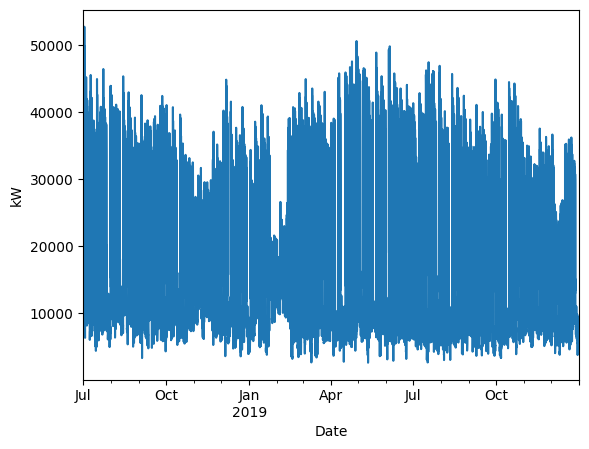

In [34]:
df_powerMeter = df_data.loc[:, df_data.columns.str.contains('kW')].copy()
df_powerMeter = df_powerMeter.sum(axis=1).rename('total_demand')
df_powerMeter.resample('h').sum().plot(xlabel='Date', ylabel='kW')

<Axes: ylabel='Density'>

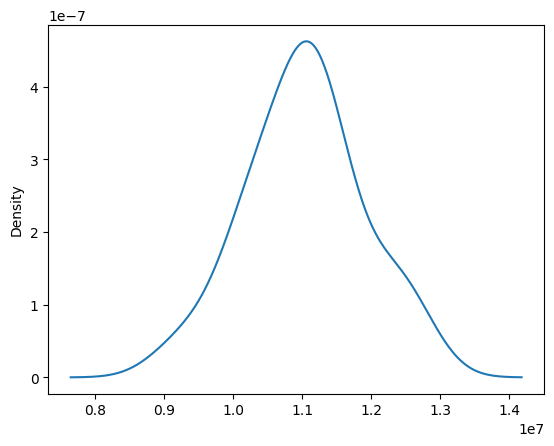

In [35]:
df_powerMeter.resample('ME').sum().plot(kind='kde')

Для проверки нормальности распределения данных в Python можно воспользоваться статистическими тестами, такими как тест Шапиро-Уилка или тест Д'Агостино.

In [36]:
from scipy.stats import shapiro

statistic, p_value = shapiro(df_powerMeter.resample('ME').sum())
alpha = 0.05
if p_value > alpha:
    print('Данные распределены нормально')
else:
    print('Данные не распределены нормально')

Данные распределены нормально


In [37]:
df_data.to_csv('merged_data.csv')

In [38]:
df_powerMeter

Date
2018-07-01 00:00:00    176.310000
2018-07-01 00:01:00    176.040000
2018-07-01 00:02:00    174.540000
2018-07-01 00:03:00    175.720000
2018-07-01 00:04:00    174.900000
                          ...    
2019-12-31 23:55:00    102.117671
2019-12-31 23:56:00    113.127671
2019-12-31 23:57:00    145.017671
2019-12-31 23:58:00    131.327671
2019-12-31 23:59:00     92.677671
Name: total_demand, Length: 790560, dtype: float64

<Axes: xlabel='Date', ylabel='kW'>

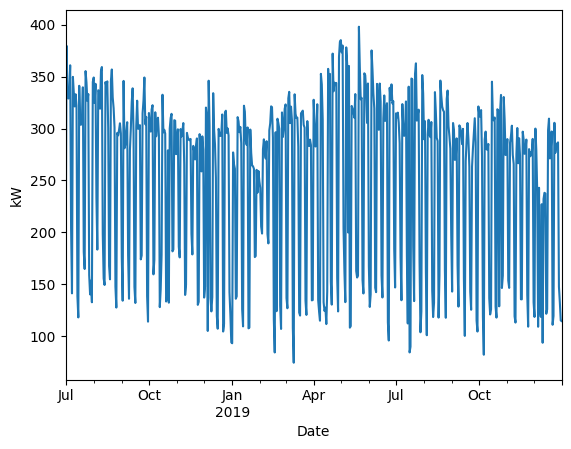

In [39]:
df_powerMeter.resample('d').mean().plot(xlabel='Date', ylabel='kW')

In [40]:
df_powerMeter

Date
2018-07-01 00:00:00    176.310000
2018-07-01 00:01:00    176.040000
2018-07-01 00:02:00    174.540000
2018-07-01 00:03:00    175.720000
2018-07-01 00:04:00    174.900000
                          ...    
2019-12-31 23:55:00    102.117671
2019-12-31 23:56:00    113.127671
2019-12-31 23:57:00    145.017671
2019-12-31 23:58:00    131.327671
2019-12-31 23:59:00     92.677671
Name: total_demand, Length: 790560, dtype: float64

### Seasonal trends analysis

In [41]:
# Seasonal trends analysis
df_data['Season'] = df_data.index.to_series().dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})
seasonal_data = df_data.groupby('Season').mean()
seasonal_data= seasonal_data.sum(axis=1)
seasonal_data

C:\Users\Valer\AppData\Local\Temp\ipykernel_15076\2573921407.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Season
Fall      1774.146386
Spring    1886.346616
Summer    1885.302455
Winter    1646.529716
dtype: float64

<Axes: title={'center': 'Mean demand by season'}, xlabel='Season', ylabel='kW'>

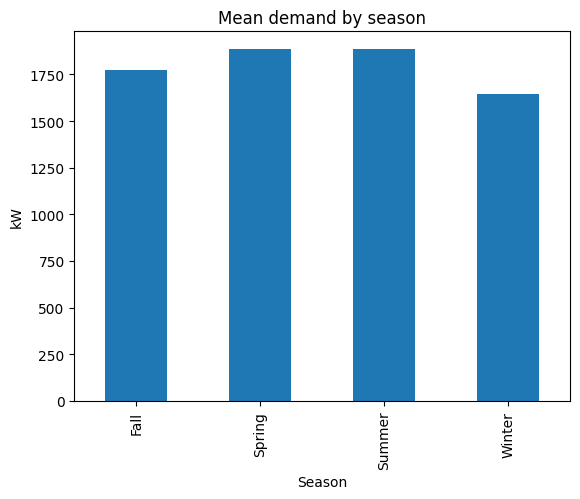

In [42]:
seasonal_data.plot(kind='bar', title='Mean demand by season', ylabel='kW')

<Axes: title={'center': 'Mean demand by day of the week'}, xlabel='DayOfWeek', ylabel='kW'>

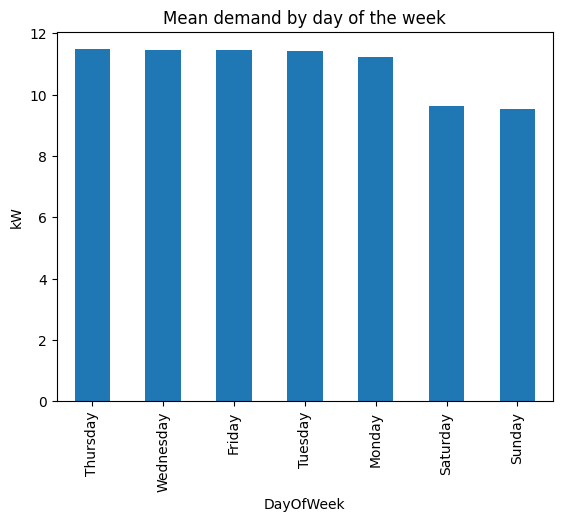

In [54]:
# Day of the week trends analysis
df_data['DayOfWeek'] = df_data.index.to_series().dt.day_name()
day_of_week_data = df_data.drop(['Season'], axis=1).groupby('DayOfWeek').mean()
day_of_week_data = day_of_week_data.mean(axis=1)
day_of_week_data
day_of_week_data.sort_values(ascending=False).plot(kind='bar', title='Mean demand by day of the week', ylabel='kW')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

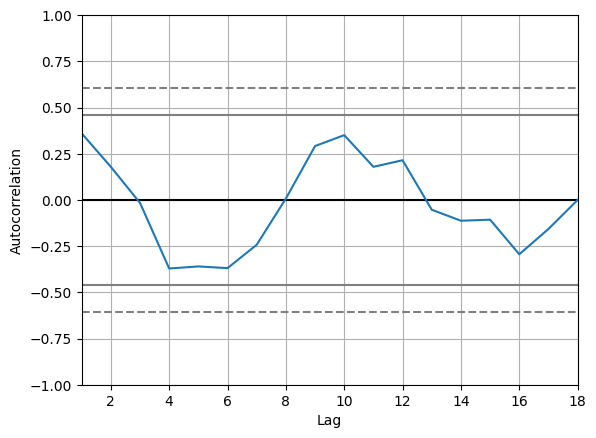

In [44]:
pd.plotting.autocorrelation_plot(df_powerMeter.resample('ME').sum())

In [11]:
X = df_data.loc[:, ~df_data.columns.str.contains('kW')].copy()
X['total_demand'] = df_data.loc[:, df_data.columns.str.contains('kW')].sum(axis=1)
X.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [46]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

f, ax = plt.subplots(figsize=(110, 90))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=40)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=40)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=2.5)

ValueError: could not convert string to float: 'Summer'

In [7]:
for i in range(1, 8):
    print(f'floor{i}')
    file = pd.concat([pd.read_csv(f'dataset/2018Floor{i}.csv'), pd.read_csv(f'dataset/2019Floor{i}.csv')])
    file = file.set_index('Date')
    file.index = pd.to_datetime(file.index)
    for col in file.loc[:, file.columns.str.contains('kW')].columns:
        file[col] = file[col].fillna(file[col].mean())
        file.bfill(inplace=True)
    file1 = file.loc[:, ~file.columns.str.contains('kW')].copy()
    file1['total_demand'] = file.loc[:, file.columns.str.contains('kW')].sum(axis=1)    
    file = file1.copy()
    
    corr = file.corr()
    corr.style.background_gradient(cmap='coolwarm')

    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.savefig(f'Plots/correlation_floor{i}.png')
    plt.close()
    
    
    

floor1
floor2
floor3
floor4
floor5
floor6


ValueError: time data "2" doesn't match format "%Y-%m-%d %H:%M:%S", at position 689128. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [10]:
print(f'floor6')
file = pd.concat([pd.read_csv(f'dataset/2018Floor6.csv'), pd.read_csv(f'dataset/2019Floor6.csv')])
file = file.set_index('Date')
file.index = pd.to_datetime(file.index)
for col in file.loc[:, file.columns.str.contains('kW')].columns:
    file[col] = file[col].fillna(file[col].mean())
    file.bfill(inplace=True)
file1 = file.loc[:, ~file.columns.str.contains('kW')].copy()
file1['total_demand'] = file.loc[:, file.columns.str.contains('kW')].sum(axis=1)    
file = file1.copy()

corr = file.corr()
corr.style.background_gradient(cmap='coolwarm')

f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig(f'Plots/correlation_floor6.png')
plt.close()

floor6


ValueError: time data "2" doesn't match format "%Y-%m-%d %H:%M:%S", at position 689128. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

{'whiskers': [<matplotlib.lines.Line2D at 0x1543ef7ebc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1543ef7f100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1543ef7e920>],
 'medians': [<matplotlib.lines.Line2D at 0x1543ef7f640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1543ef7f8e0>],
 'means': []}

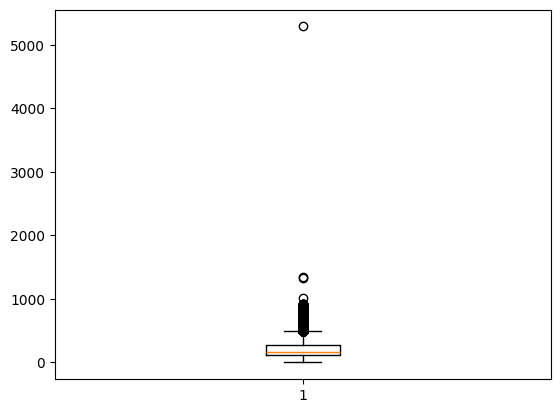

In [7]:
plt.boxplot(X['total_demand'])

In [8]:
Q1 = np.percentile(X['total_demand'], 25)
Q3 = np.percentile(X['total_demand'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in X['total_demand'] if x < lower_bound or x > upper_bound]
percentage_outliers = len(outliers) / len(X['total_demand']) * 100

print(f"Процент выбросов: {round(percentage_outliers, 3)}%")

Процент выбросов: 15.531%


In [10]:
correct_values = [x for x in X['total_demand'] if (x > lower_bound and x < upper_bound)]

Избавляемся от выбросов с помощью скользящего среднего

In [49]:
rolling_avg = X['total_demand'].rolling(window=180, min_periods=1).mean() # 150 minutes
Q1 = np.percentile(rolling_avg, 25)
Q3 = np.percentile(rolling_avg, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in rolling_avg if x < lower_bound or x > upper_bound]
percentage_outliers = len(outliers) / len(rolling_avg) * 100

print(f"Процент выбросов: {round(percentage_outliers, 3)}%")

Процент выбросов: 1.046%


In [50]:
X['total_demand'] = rolling_avg

In [52]:
X

,Floor2_z1_S1(degC),Floor2_z1_S1(RH%),Floor2_z1_S1(lux),Floor2_z2_S1(degC),Floor2_z2_S1(RH%),Floor2_z2_S1(lux),Floor2_z3_S1(degC),Floor2_z3_S1(RH%),Floor2_z3_S1(lux),Floor3_z1_S1(degC),...,Floor7_z2_S1(lux),Floor7_z4_S1(degC),Floor7_z4_S1(RH%),Floor7_z4_S1(lux),Floor7_z5_S1(degC),Floor7_z5_S1(RH%),Floor7_z5_S1(lux),Season,DayOfWeek,total_demand
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,28.36,58.93,0.0,28.85,64.89,0.0,29.30,68.22,0.0,28.44,...,0.0,29.40,65.16,0.0,28.93,66.72,0.0,Summer,Sunday,176.310000
2018-07-01 00:01:00,28.36,58.91,0.0,28.85,64.89,0.0,29.30,68.21,0.0,28.44,...,0.0,29.30,65.17,0.0,28.92,66.70,0.0,Summer,Sunday,176.175000
2018-07-01 00:02:00,28.36,58.94,0.0,28.85,64.89,0.0,29.29,68.24,0.0,28.45,...,0.0,29.30,65.18,0.0,28.92,66.70,0.0,Summer,Sunday,175.630000
2018-07-01 00:03:00,28.36,58.94,0.0,28.85,64.89,0.0,29.29,68.28,0.0,28.45,...,0.0,29.30,65.18,0.0,28.92,66.70,0.0,Summer,Sunday,175.652500
2018-07-01 00:04:00,28.36,58.94,0.0,28.84,64.90,0.0,29.29,68.30,0.0,28.45,...,0.0,29.40,65.18,0.0,28.92,66.70,0.0,Summer,Sunday,175.502000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,27.65,61.50,0.0,27.75,54.90,0.0,28.34,58.94,0.0,26.98,...,0.0,28.50,55.96,0.0,29.43,52.86,0.0,Winter,Tuesday,114.722005
2019-12-31 23:56:00,27.66,61.45,0.0,27.76,54.98,0.0,28.34,58.36,0.0,26.97,...,0.0,28.49,55.96,0.0,29.43,52.87,0.0,Winter,Tuesday,114.827605
2019-12-31 23:57:00,27.65,61.49,0.0,27.77,54.88,0.0,28.37,57.74,0.0,26.97,...,0.0,28.50,56.00,0.0,29.42,52.84,0.0,Winter,Tuesday,115.135338


Или: заменяем выбросы средним без выбросов!

In [33]:
Q1 = np.percentile(X['total_demand'], 25)
Q3 = np.percentile(X['total_demand'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Calculate the mean of X['total_demand'] without outliers
mean_no_outliers = X[(X['total_demand'] > lower_bound) & (X['total_demand'] < upper_bound)]['total_demand'].mean()

# Replace outliers in X['total_demand'] by the mean of X['total_demand'] without outliers
X['total_demand'] = X['total_demand'].apply(lambda x: mean_no_outliers if x < lower_bound or x > upper_bound else x)

Q1 = np.percentile(X['total_demand'], 25)
Q3 = np.percentile(X['total_demand'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = [x for x in X['total_demand'] if x < lower_bound or x > upper_bound]
percentage_outliers = len(outliers) / len(X['total_demand']) * 100

print(f"Процент выбросов: {round(percentage_outliers, 3)}%")

Процент выбросов: 8.369%


{'whiskers': [<matplotlib.lines.Line2D at 0x1543f564070>,
 'caps': [<matplotlib.lines.Line2D at 0x1543f5645b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1543f54fd90>],
 'medians': [<matplotlib.lines.Line2D at 0x1543f564af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1543f564d90>],
 'means': []}

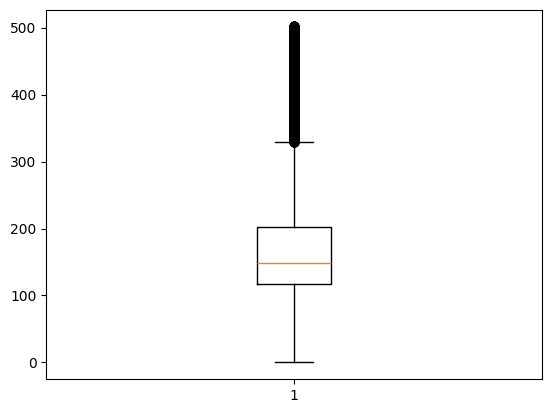

In [11]:
plt.boxplot(correct_values)
#X.to_csv('data_for_training.csv')

Понятие стационарного временного ряда означает, что его среднее значение не изменяется во времени, т. е. временной ряд не имеет тренда. 
\
На выходе теста Дики-Фуллера мы получим статистику теста Дики-Фуллера и p-значение. Если p-значение меньше уровня значимости (обычно 0.05), то мы можем отклонить нулевую гипотезу о нестационарности ряда и считать его стационарным.

In [37]:
X = pd.read_csv('data_for_training.csv')
X = X.set_index('Date')
X.index = pd.to_datetime(X.index)
X.drop(['lol'], axis=1, inplace=True)

In [19]:
result = adfuller(df_powerMeter.resample('ME').sum())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.911709
p-value: 0.326573
Critical Values:
	1%: -3.889
	5%: -3.054
	10%: -2.667


In [36]:
result = adfuller(X['total_demand'].resample('ME').sum())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.903442
p-value: 0.330444
Critical Values:
	1%: -3.889
	5%: -3.054
	10%: -2.667


Результат теста Дики-Фуллера показывает, что уровень значимости меньше 0.05, что означает отклонение нулевой гипотезы о наличии единичных корней в данных (то есть данные являются стационарными). Это говорит о том, что временной ряд стационарен.

In [22]:

# Perform seasonal decomposition on the resampled data
result = seasonal_decompose(df_powerMeter.resample('D').sum(), model='additive', period=365)

# Визуализация результатов разложения
plt.figure(figsize=(10, 6))
result.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 730 observations. x only has 549 observation(s)

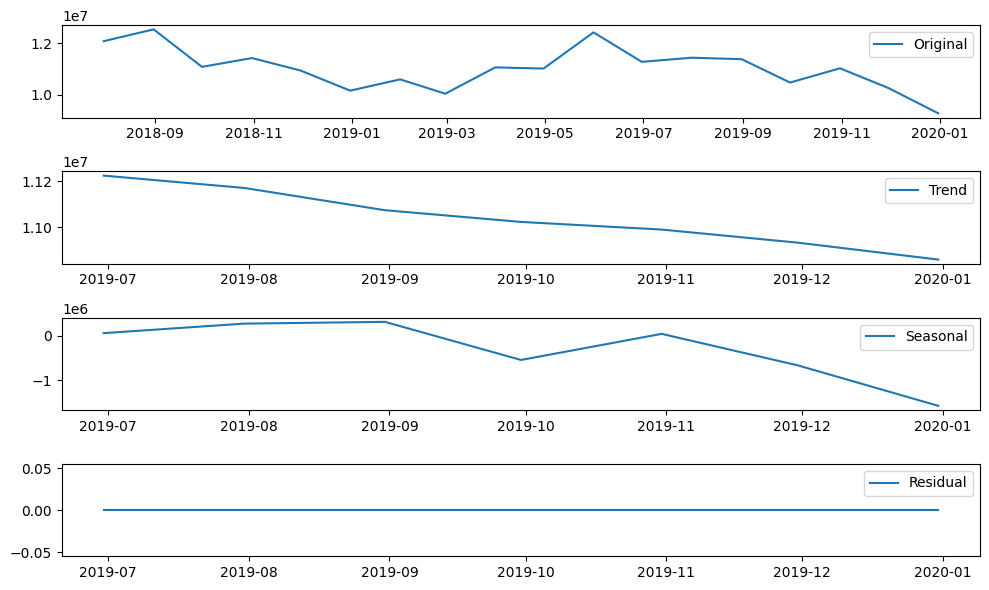

In [32]:
df_powerMeter_ma = df_powerMeter.resample('ME').sum().rolling(window=12).mean()
trend = df_powerMeter_ma
seasonal = df_powerMeter.resample('ME').sum() - df_powerMeter_ma
residual = df_powerMeter.resample('ME').sum() - trend - seasonal

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(df_powerMeter.resample('ME').sum(), label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [40]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

f, ax = plt.subplots(figsize=(110, 90))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=40)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=40)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr['total_demand'], cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=2.5, annot=True)

C:\Users\Valer\AppData\Local\Temp\ipykernel_22464\571025292.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Valer\AppData\Local\Temp\ipykernel_22464\571025292.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



IndexError: Inconsistent shape between the condition and the input (got (73, 1) and (73,))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
X = X['total_demand']
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse)

C:\Users\Valer\AppData\Local\Temp\ipykernel_2184\1739459916.py:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



predicted=146.943773, expected=146.910000


MemoryError: Unable to allocate 2.41 MiB for an array with shape (1, 632449) and data type int32

In [15]:
X

,Floor2_z1_S1(degC),Floor2_z1_S1(RH%),Floor2_z1_S1(lux),Floor2_z2_S1(degC),Floor2_z2_S1(RH%),Floor2_z2_S1(lux),Floor2_z3_S1(degC),Floor2_z3_S1(RH%),Floor2_z3_S1(lux),Floor2_z4_S1(degC),...,Floor7_z2_S1(degC),Floor7_z2_S1(RH%),Floor7_z2_S1(lux),Floor7_z4_S1(degC),Floor7_z4_S1(RH%),Floor7_z4_S1(lux),Floor7_z5_S1(degC),Floor7_z5_S1(RH%),Floor7_z5_S1(lux),total_demand
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,28.36,58.93,0.0,28.85,64.89,0.0,29.30,68.22,0.0,22.50,...,28.57,66.24,0.0,29.40,65.16,0.0,28.93,66.72,0.0,176.310000
2018-07-01 00:01:00,28.36,58.91,0.0,28.85,64.89,0.0,29.30,68.21,0.0,22.50,...,28.56,66.26,0.0,29.30,65.17,0.0,28.92,66.70,0.0,176.040000
2018-07-01 00:02:00,28.36,58.94,0.0,28.85,64.89,0.0,29.29,68.24,0.0,22.50,...,28.56,66.28,0.0,29.30,65.18,0.0,28.92,66.70,0.0,174.540000
2018-07-01 00:03:00,28.36,58.94,0.0,28.85,64.89,0.0,29.29,68.28,0.0,22.50,...,28.56,66.29,0.0,29.30,65.18,0.0,28.92,66.70,0.0,175.720000
2018-07-01 00:04:00,28.36,58.94,0.0,28.84,64.90,0.0,29.29,68.30,0.0,22.50,...,28.56,66.32,0.0,29.40,65.18,0.0,28.92,66.70,0.0,174.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,27.65,61.50,0.0,27.75,54.90,0.0,28.34,58.94,0.0,27.81,...,28.88,54.90,0.0,28.50,55.96,0.0,29.43,52.86,0.0,102.117671
2019-12-31 23:56:00,27.66,61.45,0.0,27.76,54.98,0.0,28.34,58.36,0.0,27.81,...,28.87,54.84,0.0,28.49,55.96,0.0,29.43,52.87,0.0,113.127671
2019-12-31 23:57:00,27.65,61.49,0.0,27.77,54.88,0.0,28.37,57.74,0.0,27.80,...,28.88,54.87,0.0,28.50,56.00,0.0,29.42,52.84,0.0,145.017671
